In [37]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [38]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [39]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [40]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [41]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [42]:
# View all of the classes that automap found
Base.classes.keys() 

['measurement', 'station']

In [43]:
# Save references to each table
Measurement = Base.classes.measurement
Station     = Base.classes.station

In [44]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [45]:
from sqlalchemy import create_engine, inspect

In [46]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [47]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [48]:
# Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [49]:
# Find the most recent date in the data set.
latest_date  = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23',)

In [50]:
latest_date1 =list(np.ravel(latest_date))[0]
latest_date1

'2017-08-23'

In [51]:
latest_date2 = dt.datetime.strptime(latest_date1,"%Y-%m-%d")
latest_date2

datetime.datetime(2017, 8, 23, 0, 0)

In [52]:
import datetime as dt

Query Date:  2016-08-23 00:00:00


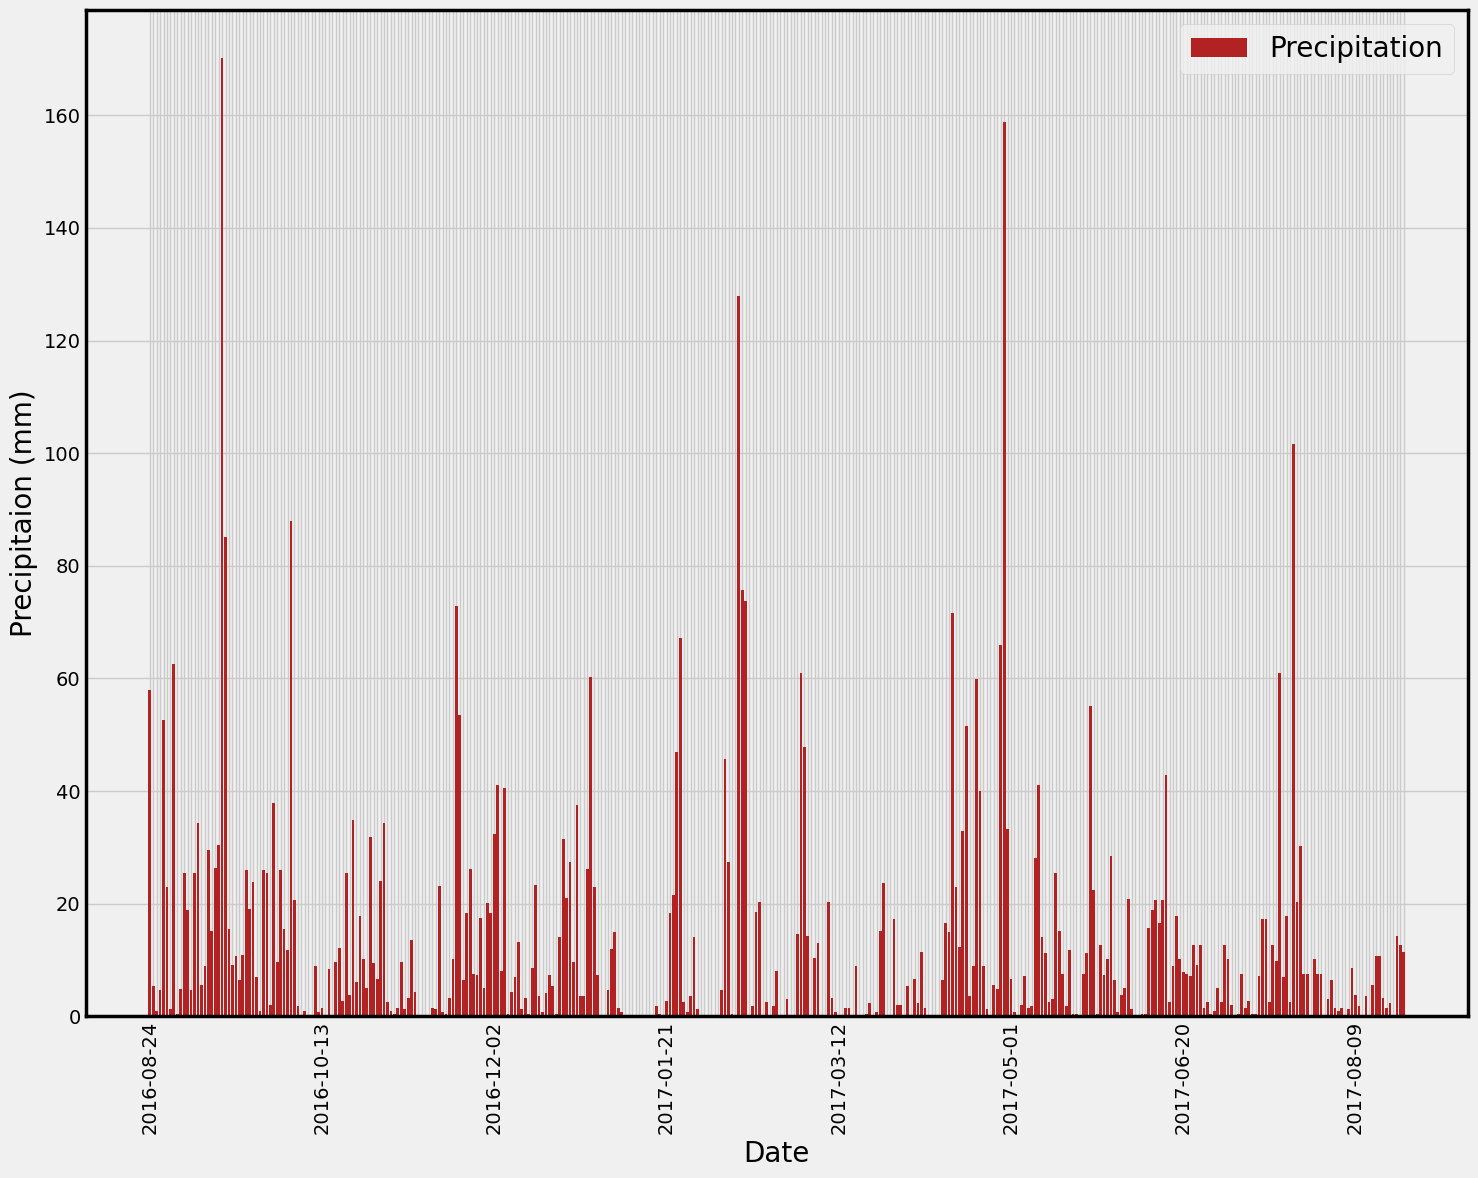

In [53]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date      = latest_date2 - dt.timedelta(days=365)
print("Query Date: ", query_date)

# Perform a query to retrieve the data and precipitation scores
precipitation_q = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > query_date).\
                  order_by(Measurement.date).all()
precipitation_q

# Save the query results as a Pandas DataFrame. Explicitly set the column names
# read in your SQL query results using pandas
# Sort the dataframe by date
dataframe      = pd.read_sql(session.query(Measurement.date, Measurement.prcp).\
                             filter(Measurement.date > query_date).order_by(Measurement.date).\
                             statement,session.bind) 
dataframe.dropna()

# Use Pandas Plotting with Matplotlib to plot the data
fig  = plt.figure(figsize=(15,12))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Add a subplot to the figure
ax   = fig.add_subplot(111)
x    = dataframe["date"]
y    = dataframe["prcp"]

# Create the bar plot
bars = ax.bar(x, y, color='firebrick', label="Precipitation")

#plt.title("Number of Unit Sales(2018-2021)",fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Precipitaion (mm)', fontsize=20)

#plt.minorticks_on() 
#plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
#plt.tick_params(which='minor', length=4, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(37.5,46)

every_nth = 50
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.xticks(rotation=90)

# Show the plot
plt.legend(loc="upper right", fontsize=20)
plt.tight_layout()
#plt.savefig("Images/Unit0.png")
plt.show()

In [55]:
# 50th Percentile
def p25(x):
    return x.quantile(0.25)

# 90th Percentile
def p50(x):
    return x.quantile(0.50)

# 90th Percentile
def p75(x):
    return x.quantile(0.75)

In [56]:
dataframe.agg({'prcp' : ['count', 'mean', 'std', 'min', p25, p50, p75, 'max']})

,prcp
count,2015.000000
mean,4.485112
std,11.690532
min,0.000000
p25,0.000000
p50,0.500000
p75,3.300000
max,170.200000


# Exploratory Station Analysis

In [57]:
# Design a query to calculate the total number of stations in the dataset
Station_number   = session.query(Station).count()
print(Station_number)

9


In [58]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
query_s1 = session.query(Measurement.station, func.count(Measurement.station)).\
                         group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
query_s1[0]

('USC00519281', 2772)

In [59]:
query_s1 = session.query(Measurement.station).\
                         group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
query_s1[0]

('USC00519281',)

In [60]:
query_s3 = list(np.ravel(query_s1))[0]
query_s3

'USC00519281'

In [61]:
query_s2 = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
                         .filter(Measurement.station == query_s3).all()
query_s2

[(12.2, 29.4, 22.03582251082252)]

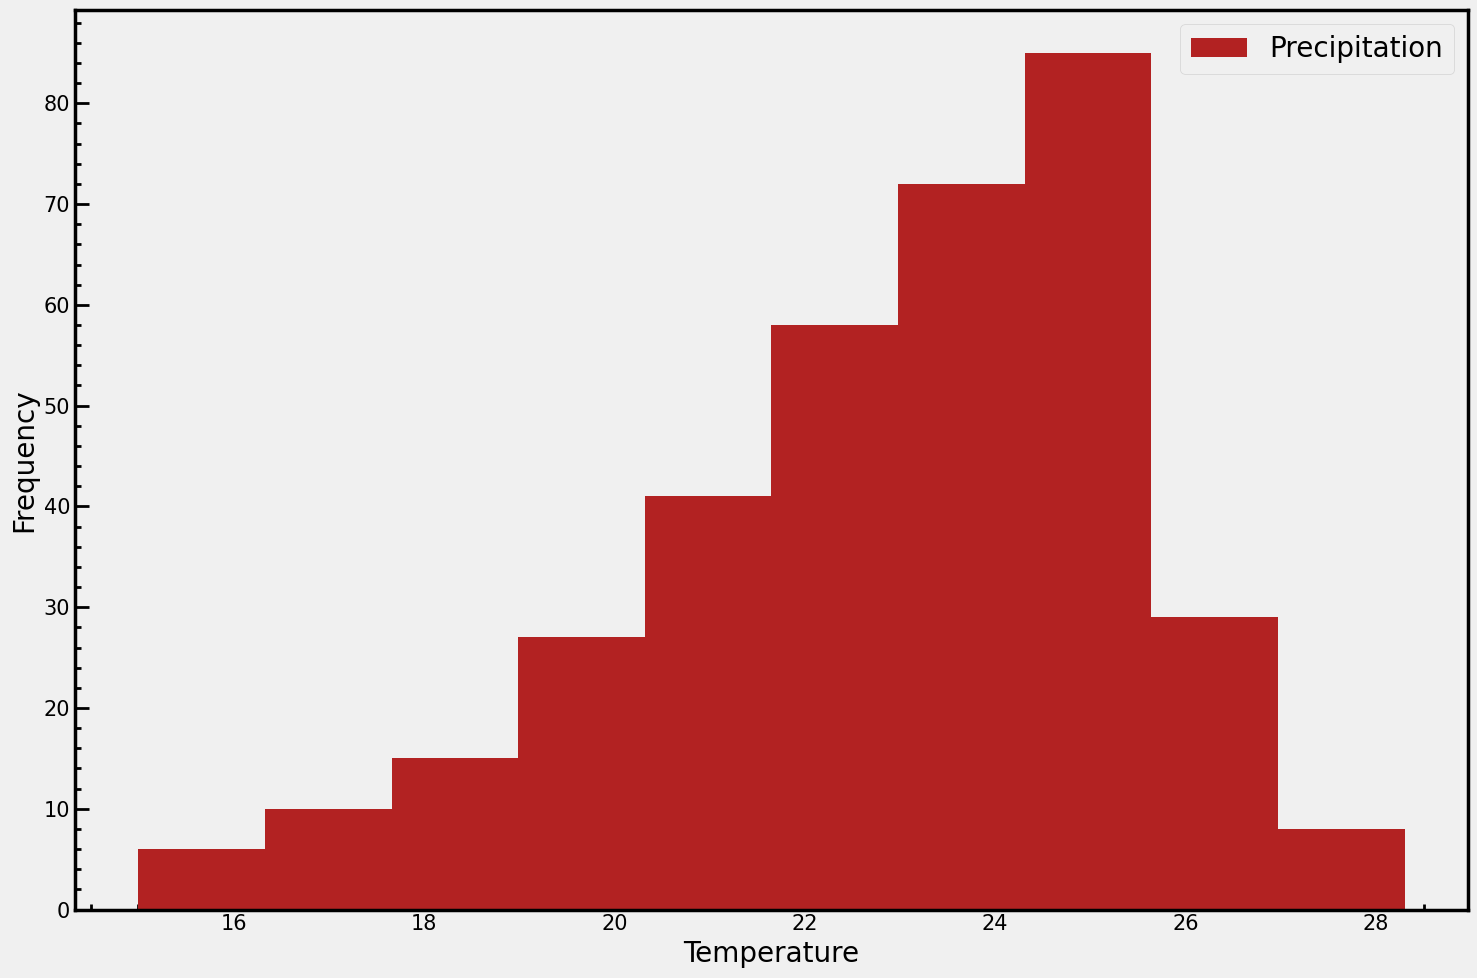

In [62]:
dataframe      = pd.read_sql(session.query(Measurement.tobs).filter(Measurement.station == query_s3, Measurement.date > query_date).\
                             statement,session.bind) 
dataframe.dropna()

# Use Pandas Plotting with Matplotlib to plot the data
fig  = plt.figure(figsize=(15,10))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Add a subplot to the figure
ax   = fig.add_subplot(111)
x    = dataframe["tobs"]

# Create the bar plot
plt.hist(x, color='firebrick', label="Precipitation")

plt.xlabel('Temperature', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt. grid(False)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=4, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(37.5,46)

# Show the plot
plt.legend(loc="upper right", fontsize=20)
plt.tight_layout()
#plt.savefig("Images/Unit0.png")
plt.show()

# Close Session

In [63]:
# Close Session
session.close()